#Exploratory Data Analysis

In [1]:
#Importing Libraries
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing Data
data= pd.read_json("D:/transactions.txt", lines=True, orient= 'records')

In [4]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [6]:
data.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

In [7]:
data['merchantCity']. unique()

array([''], dtype=object)

In [8]:
data[('merchantZip')]. unique()

array([''], dtype=object)

In [9]:
data['merchantState']. unique()

array([''], dtype=object)

In [10]:
data['expirationDateKeyInMatch'].unique()

array([False,  True])

We found a few unwanted columns, we will be deleting those.

In [11]:
data=data.drop(['merchantCity', 'merchantState','posOnPremises','recurringAuthInd','echoBuffer','merchantZip'], axis=1)

In [12]:
data.rename(columns = {'isFraud':'y'}, inplace = True)

In [13]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,y
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


###Categorial Features

In [14]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtype=='O')& (feature not in ['y']))]
print(categorical_features)

['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


Above are the categorical factors.
There are total 11 factors 

In [15]:
categorical_data = data.select_dtypes(exclude=np.number)      # we will exclude data with numeric features
categorical_col = categorical_data.columns                    # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
   transactionDateTime         merchantName acqCountry merchantCountryCode  \
0  2016-08-13T14:27:32                 Uber         US                  US   
1  2016-10-11T05:05:54          AMC #191138         US                  US   
2  2016-11-08T09:18:39           Play Store         US                  US   
3  2016-12-10T02:14:50           Play Store         US                  US   
4  2016-03-24T21:04:46  Tim Hortons #947751         US                  US   

  posEntryMode posConditionCode merchantCategoryCode currentExpDate  \
0           02               01            rideshare        06/2023   
1           09               01        entertainment        02/2024   
2           09               01           mobileapps        08/2025   
3           09               01           mobileapps        08/2025   
4           02               01             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange transactionType  cardPresent  \
0      2

In [16]:
categorical_data.describe()

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,cardPresent,expirationDateKeyInMatch,y
count,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363
unique,776637,2490,5,5,6,4,19,165,1820,2184,4,2,2,2
top,2016-12-25T14:04:15,Uber,US,US,05,01,online_retail,03/2029,2014-06-21,2016-03-15,PURCHASE,False,False,False
freq,4,25613,774709,778511,315035,628787,202156,5103,33623,3819,745193,433495,785320,773946


In [17]:
for categorical_feature in categorical_features:
    print(data.groupby(['y',categorical_feature]).size())

y      transactionDateTime
False  2016-01-01T00:01:02    1
       2016-01-01T00:01:44    1
       2016-01-01T00:01:47    1
       2016-01-01T00:02:04    1
       2016-01-01T00:02:19    1
                             ..
True   2016-12-30T22:31:53    1
       2016-12-30T22:36:08    1
       2016-12-30T22:46:34    1
       2016-12-30T22:49:02    1
       2016-12-30T23:15:04    1
Length: 776951, dtype: int64
y      merchantName             
False  1st BBQ                      822
       1st Deli                     797
       1st Pub                      778
       1st Restaurant               850
       1st Sandwitch Bar #119707    772
                                   ... 
True   staples.com                  399
       target.com                   362
       walmart.com                  446
       westelm.com                    6
       williamssonoma.com             2
Length: 3532, dtype: int64
y      acqCountry
False                  4413
       CAN             2369
       MEX        

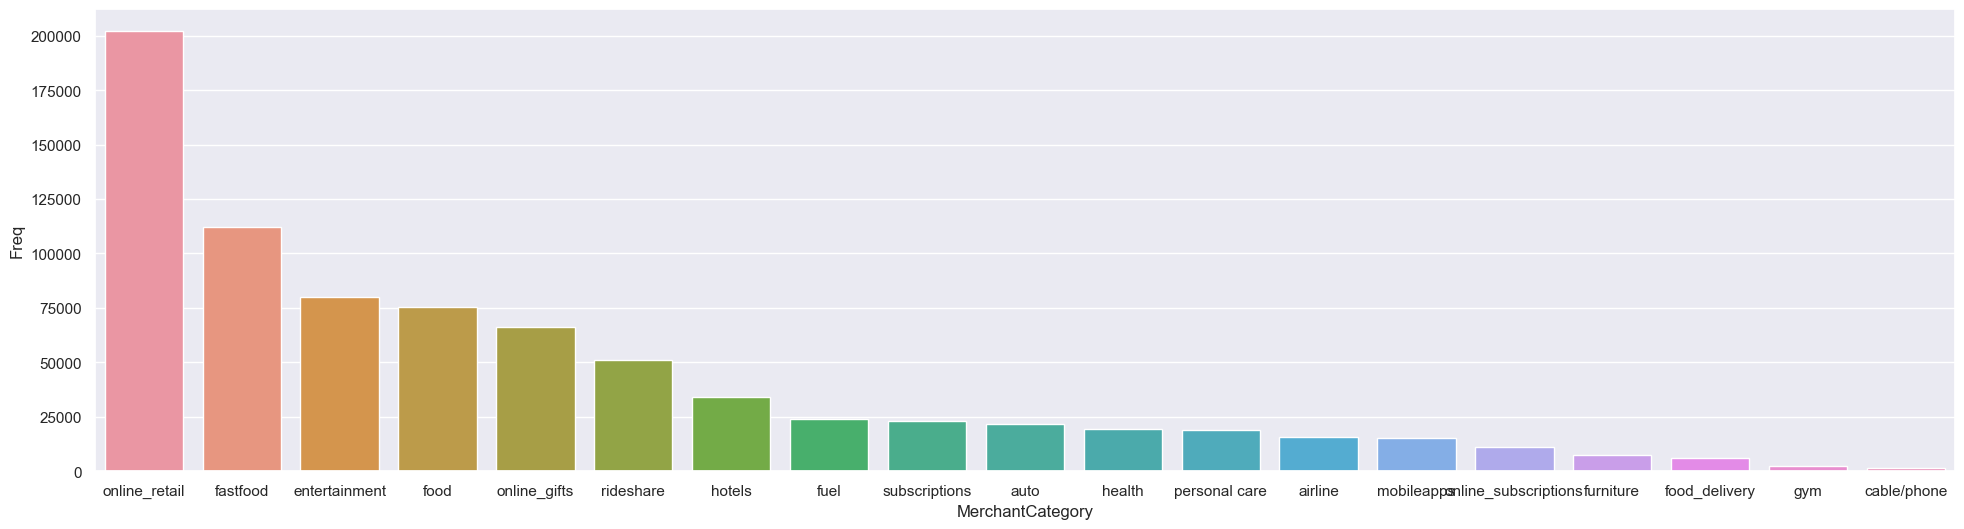

In [18]:
t=pd.DataFrame(data['merchantCategoryCode'].value_counts()).reset_index(drop=False)
t.columns=['MerchantCategory','Freq'] 
plt.figure(figsize=(24,6))
sns.set_theme(context='notebook', style='darkgrid', palette="pastel", font='sans-serif', font_scale=1, color_codes=False, rc=None) # set theme
ax = sns.barplot(x="MerchantCategory", y="Freq", data=t) # draw barplot


So basically max transaction happend on online retail,fastfood

In [19]:
data.creditLimit.unique() # Credit Limit types

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000], dtype=int64)

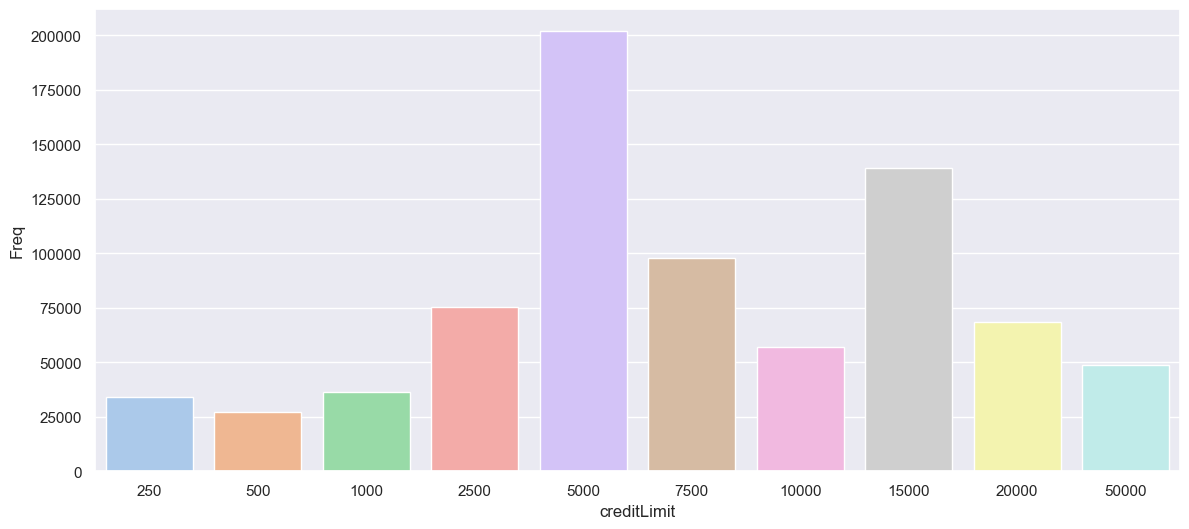

In [20]:
z=pd.DataFrame(data.groupby('creditLimit').count()['y']).reset_index(drop=False)
z.columns=['creditLimit','Freq'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme(context='notebook', style='darkgrid', palette="pastel", font='sans-serif', font_scale=1, color_codes=False, rc=None) # set theme
ax = sns.barplot(x="creditLimit", y="Freq", data=z) # draw barplot

5000 and 15000 card has been extensively used

Capital One card transactions are done in 4 countries such as US, Canada, Mexico and Puerto Rico.

In [20]:
trans_type=pd.DataFrame(data.transactionType.value_counts()).reset_index(drop=False)
trans_type

,index,transactionType
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169
3,,698


Max transaction happened through purchase

Text(0, 0.5, 'count')

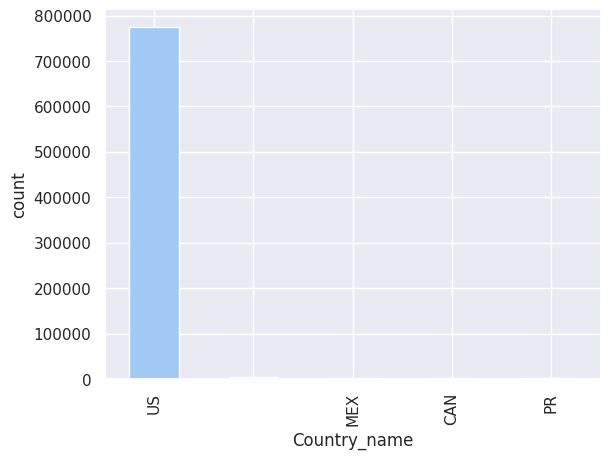

In [21]:
data['acqCountry'].value_counts().plot(kind='bar')
plt.xlabel('Country_name')
plt.ylabel('count')

Most of the data is from us

In [22]:
data[data['acqCountry'] == 'CAN']['acqCountry'].count()


2424

In [23]:
data[data['acqCountry'] == 'MEX']['acqCountry'].count()


3130

In [24]:
data[data['acqCountry'] == 'PR']['acqCountry'].count()

1538

Transaction Details

In [25]:
data.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

From here the max transaction is  $2011 
on an average transaction is 136

<ipython-input-26-6de5cceff6e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.transactionAmount, kde=True, color='red', norm_hist= True)


<Axes: xlabel='transactionAmount', ylabel='Density'>

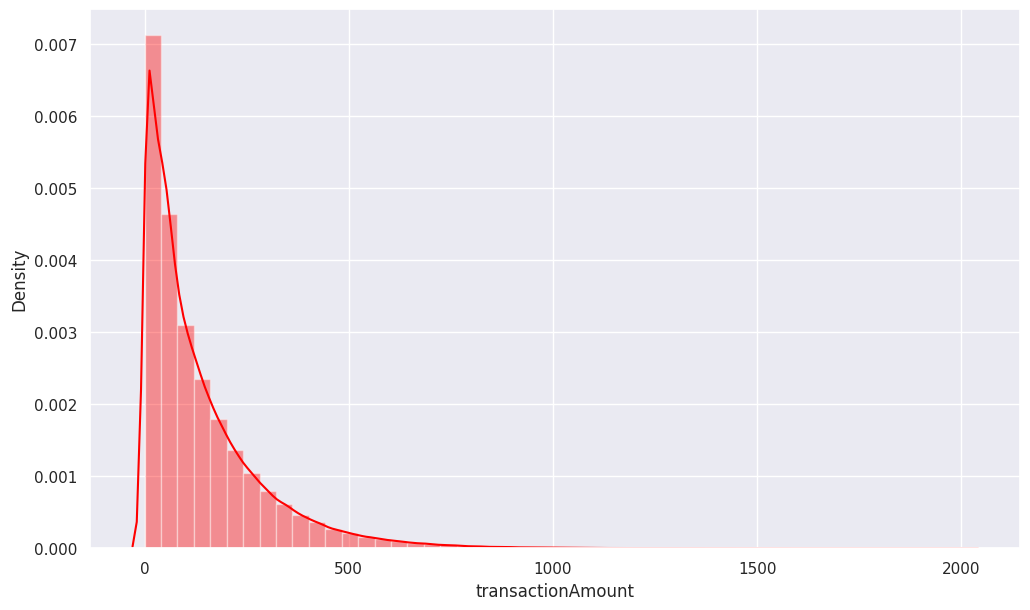

In [26]:
plt.figure(figsize=(12, 7))
sns.distplot(data.transactionAmount, kde=True, color='red', norm_hist= True)

[Text(0, 0.5, 'Freq')]

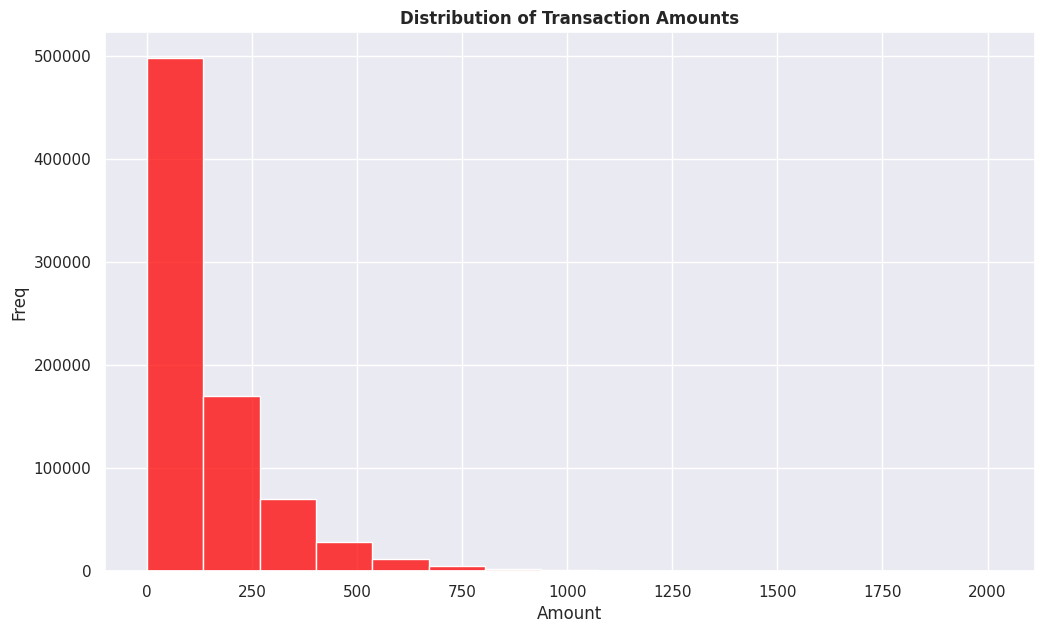

In [27]:
# visualize transaction amounts by using the histogram
sns.set()
plt.figure(figsize=(12, 7))
plt.title('Distribution of Transaction Amounts', weight='bold')
ax=sns.histplot(data, x="transactionAmount", color='red',bins=15)
ax.set(xlabel='Amount')
ax.set(ylabel='Freq')

Most of the fraudlent data is from website and in transaction type we can see purchase. So basically purchase from website have max fraudulent case.

Numerical Features

In [28]:
numerical_features=[feature for feature in data.columns if ((data[feature].dtype !='O')& (feature not in ['y']))]
print(numerical_features)

['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch']


In [29]:
data[numerical_features].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
0,737265056,737265056,5000,5000.0,98.55,414,414,1803,0.0,False,False
1,737265056,737265056,5000,5000.0,74.51,486,486,767,0.0,True,False
2,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,False,False
3,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,False,False
4,830329091,830329091,5000,5000.0,71.18,885,885,3143,0.0,True,False


Discrete Features

In [30]:
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<10]
print(discrete_features)

['cardPresent', 'expirationDateKeyInMatch']


Continuous Features

In [31]:
continues_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continues_features)

['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']


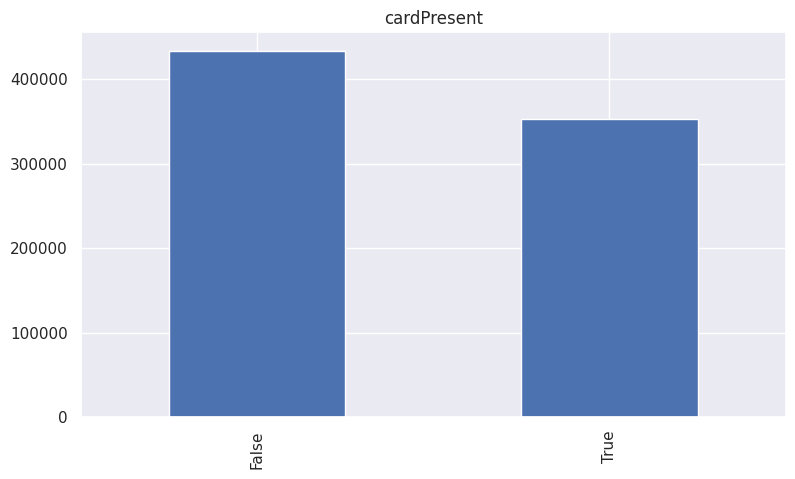

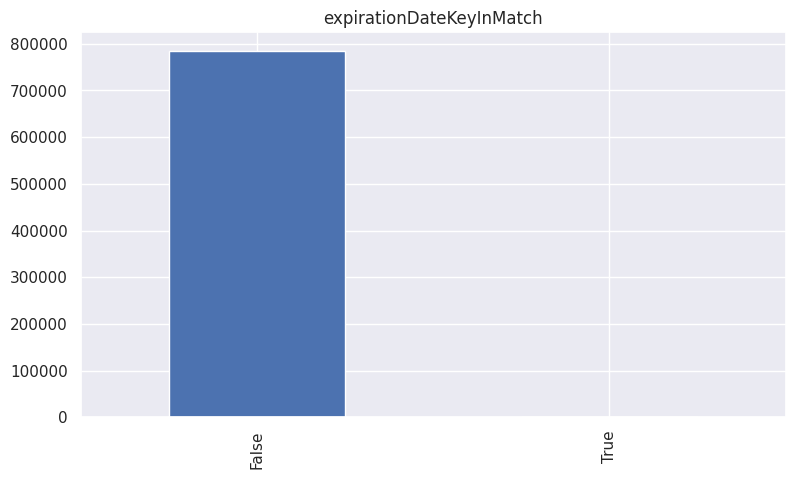

In [32]:
for column in discrete_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

#Feature Engineering

In [21]:
d= data.copy()
d

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,y
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [22]:
d['transactionDateTime'] = pd.to_datetime(d['transactionDateTime']).apply(lambda x: x.timestamp())
d

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,y
0,737265056,737265056,5000,5000.00,1.471098e+09,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,1.476162e+09,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,1.478597e+09,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,1.481336e+09,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,1.458853e+09,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,1.482432e+09,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,1.482683e+09,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,1.482854e+09,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,1.482971e+09,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


### Label Encoding

In [23]:
categorical_features1=[feature for feature in data.columns if ((data[feature].dtype=='O')& (feature not in ['y', 'transactionDateTime']))]
print(categorical_features1)

['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features1 :
  d[str(i)+'_encoded'] = le.fit_transform(d[i])
d

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantName_encoded,acqCountry_encoded,merchantCountryCode_encoded,posEntryMode_encoded,posConditionCode_encoded,merchantCategoryCode_encoded,currentExpDate_encoded,accountOpenDate_encoded,dateOfLastAddressChange_encoded,transactionType_encoded
0,737265056,737265056,5000,5000.00,1.471098e+09,98.55,Uber,US,US,02,...,2086,4,4,1,1,17,73,1529,1529,2
1,737265056,737265056,5000,5000.00,1.476162e+09,74.51,AMC #191138,US,US,09,...,27,4,4,3,1,3,18,1529,1529,2
2,737265056,737265056,5000,5000.00,1.478597e+09,7.47,Play Store,US,US,09,...,1305,4,4,3,1,12,103,1529,1529,2
3,737265056,737265056,5000,5000.00,1.481336e+09,7.47,Play Store,US,US,09,...,1305,4,4,3,1,12,103,1529,1529,2
4,830329091,830329091,5000,5000.00,1.458853e+09,71.18,Tim Hortons #947751,US,US,02,...,2084,4,4,1,1,4,134,1673,1673,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,1.482432e+09,119.92,Lyft,US,US,90,...,1061,4,4,5,1,17,154,702,701,2
786359,732852505,732852505,50000,48785.04,1.482683e+09,18.89,hulu.com,US,US,09,...,2479,4,4,3,1,15,101,702,701,2
786360,732852505,732852505,50000,48766.15,1.482854e+09,49.43,Lyft,US,US,02,...,1061,4,4,1,1,17,103,702,701,2
786361,732852505,732852505,50000,48716.72,1.482971e+09,49.89,walmart.com,US,US,09,...,2487,4,4,3,3,14,86,702,701,2


In [25]:
for i in categorical_features1:
  d=d.drop([i], axis=1)
d

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,...,merchantName_encoded,acqCountry_encoded,merchantCountryCode_encoded,posEntryMode_encoded,posConditionCode_encoded,merchantCategoryCode_encoded,currentExpDate_encoded,accountOpenDate_encoded,dateOfLastAddressChange_encoded,transactionType_encoded
0,737265056,737265056,5000,5000.00,1.471098e+09,98.55,414,414,1803,0.00,...,2086,4,4,1,1,17,73,1529,1529,2
1,737265056,737265056,5000,5000.00,1.476162e+09,74.51,486,486,767,0.00,...,27,4,4,3,1,3,18,1529,1529,2
2,737265056,737265056,5000,5000.00,1.478597e+09,7.47,486,486,767,0.00,...,1305,4,4,3,1,12,103,1529,1529,2
3,737265056,737265056,5000,5000.00,1.481336e+09,7.47,486,486,767,0.00,...,1305,4,4,3,1,12,103,1529,1529,2
4,830329091,830329091,5000,5000.00,1.458853e+09,71.18,885,885,3143,0.00,...,2084,4,4,1,1,4,134,1673,1673,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,1.482432e+09,119.92,936,936,3783,1095.04,...,1061,4,4,5,1,17,154,702,701,2
786359,732852505,732852505,50000,48785.04,1.482683e+09,18.89,939,939,3388,1214.96,...,2479,4,4,3,1,15,101,702,701,2
786360,732852505,732852505,50000,48766.15,1.482854e+09,49.43,936,936,3783,1233.85,...,1061,4,4,1,1,17,103,702,701,2
786361,732852505,732852505,50000,48716.72,1.482971e+09,49.89,939,939,3388,1283.28,...,2487,4,4,3,3,14,86,702,701,2


In [26]:
d.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   accountNumber                    786363 non-null  int64  
 1   customerId                       786363 non-null  int64  
 2   creditLimit                      786363 non-null  int64  
 3   availableMoney                   786363 non-null  float64
 4   transactionDateTime              786363 non-null  float64
 5   transactionAmount                786363 non-null  float64
 6   cardCVV                          786363 non-null  int64  
 7   enteredCVV                       786363 non-null  int64  
 8   cardLast4Digits                  786363 non-null  int64  
 9   currentBalance                   786363 non-null  float64
 10  cardPresent                      786363 non-null  bool   
 11  expirationDateKeyInMatch         786363 non-null  bool   
 12  y 

### One Hot Encoding

In [27]:
#performing OHE on columns, merging the new column with the sub dataset and then drop the old column:
colz=['cardPresent','expirationDateKeyInMatch','y']
for i in colz:
  d= pd.concat([d, pd.get_dummies(d[i], drop_first=True)], axis=1).drop(i, axis=1)
d.head()



,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,...,posEntryMode_encoded,posConditionCode_encoded,merchantCategoryCode_encoded,currentExpDate_encoded,accountOpenDate_encoded,dateOfLastAddressChange_encoded,transactionType_encoded,True,True,True
0,737265056,737265056,5000,5000.0,1.471098e+09,98.55,414,414,1803,0.0,...,1,1,17,73,1529,1529,2,0,0,0
1,737265056,737265056,5000,5000.0,1.476162e+09,74.51,486,486,767,0.0,...,3,1,3,18,1529,1529,2,1,0,0
2,737265056,737265056,5000,5000.0,1.478597e+09,7.47,486,486,767,0.0,...,3,1,12,103,1529,1529,2,0,0,0
3,737265056,737265056,5000,5000.0,1.481336e+09,7.47,486,486,767,0.0,...,3,1,12,103,1529,1529,2,0,0,0
4,830329091,830329091,5000,5000.0,1.458853e+09,71.18,885,885,3143,0.0,...,1,1,4,134,1673,1673,2,1,0,0


In [28]:
d.columns.values[20:23] = ['cardPresent_true', 'expirationDateKeyInMatch_true','Fraud_true']
d

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,...,posEntryMode_encoded,posConditionCode_encoded,merchantCategoryCode_encoded,currentExpDate_encoded,accountOpenDate_encoded,dateOfLastAddressChange_encoded,transactionType_encoded,cardPresent_true,expirationDateKeyInMatch_true,Fraud_true
0,737265056,737265056,5000,5000.00,1.471098e+09,98.55,414,414,1803,0.00,...,1,1,17,73,1529,1529,2,0,0,0
1,737265056,737265056,5000,5000.00,1.476162e+09,74.51,486,486,767,0.00,...,3,1,3,18,1529,1529,2,1,0,0
2,737265056,737265056,5000,5000.00,1.478597e+09,7.47,486,486,767,0.00,...,3,1,12,103,1529,1529,2,0,0,0
3,737265056,737265056,5000,5000.00,1.481336e+09,7.47,486,486,767,0.00,...,3,1,12,103,1529,1529,2,0,0,0
4,830329091,830329091,5000,5000.00,1.458853e+09,71.18,885,885,3143,0.00,...,1,1,4,134,1673,1673,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,1.482432e+09,119.92,936,936,3783,1095.04,...,5,1,17,154,702,701,2,0,0,0
786359,732852505,732852505,50000,48785.04,1.482683e+09,18.89,939,939,3388,1214.96,...,3,1,15,101,702,701,2,0,0,0
786360,732852505,732852505,50000,48766.15,1.482854e+09,49.43,936,936,3783,1233.85,...,1,1,17,103,702,701,2,0,0,0
786361,732852505,732852505,50000,48716.72,1.482971e+09,49.89,939,939,3388,1283.28,...,3,3,14,86,702,701,2,0,0,0


In [41]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   accountNumber                    786363 non-null  int64  
 1   customerId                       786363 non-null  int64  
 2   creditLimit                      786363 non-null  int64  
 3   availableMoney                   786363 non-null  float64
 4   transactionDateTime              786363 non-null  float64
 5   transactionAmount                786363 non-null  float64
 6   cardCVV                          786363 non-null  int64  
 7   enteredCVV                       786363 non-null  int64  
 8   cardLast4Digits                  786363 non-null  int64  
 9   currentBalance                   786363 non-null  float64
 10  merchantName_encoded             786363 non-null  int64  
 11  acqCountry_encoded               786363 non-null  int64  
 12  me

#MODEL TRAINING

In [29]:
#features of model:
x=d.drop('Fraud_true',axis=1)
y=d['Fraud_true']

# setting data for training and testing:
from sklearn.model_selection import train_test_split

# setting test data size 20%
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.20, random_state=6)

Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

##DECISION TREE MODEL
1. Importing libraries and creating model instance
2. Model training
3. Plotting classification
4. Prediction
5. Confusion Matrix
6. Model Performance Report
7. AUC
8. Hyperparameter tuning
9. Model based on best hyperparameters

### Training model

In [31]:
from sklearn import tree
#creating model instance
deci = tree.DecisionTreeClassifier(random_state=6, max_depth=20)
#fitting model
deci.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=6)

###Plotting clasification

[Text(0.5221558316757565, 0.9761904761904762, 'transactionAmount <= 0.172\ngini = 0.031\nsamples = 629090\nvalue = [619141, 9949]'),
 Text(0.2379708962343207, 0.9285714285714286, 'transactionAmount <= -0.498\ngini = 0.021\nsamples = 438171\nvalue = [433570, 4601]'),
 Text(0.05262604424357187, 0.8809523809523809, 'merchantCategoryCode_encoded <= -1.711\ngini = 0.014\nsamples = 254961\nvalue = [253177, 1784]'),
 Text(0.002795948358819821, 0.8333333333333334, 'merchantName_encoded <= -1.367\ngini = 0.042\nsamples = 4586\nvalue = [4487, 99]'),
 Text(0.0014852525406892337, 0.7857142857142857, 'cardLast4Digits <= 1.401\ngini = 0.141\nsamples = 920\nvalue = [850, 70]'),
 Text(0.0010029036448383892, 0.7380952380952381, 'cardLast4Digits <= -1.202\ngini = 0.077\nsamples = 751\nvalue = [721, 30]'),
 Text(0.000496676090777107, 0.6904761904761905, 'cardLast4Digits <= -1.214\ngini = 0.249\nsamples = 165\nvalue = [141, 24]'),
 Text(0.0003438526782303049, 0.6428571428571429, 'gini = 0.0\nsamples = 141

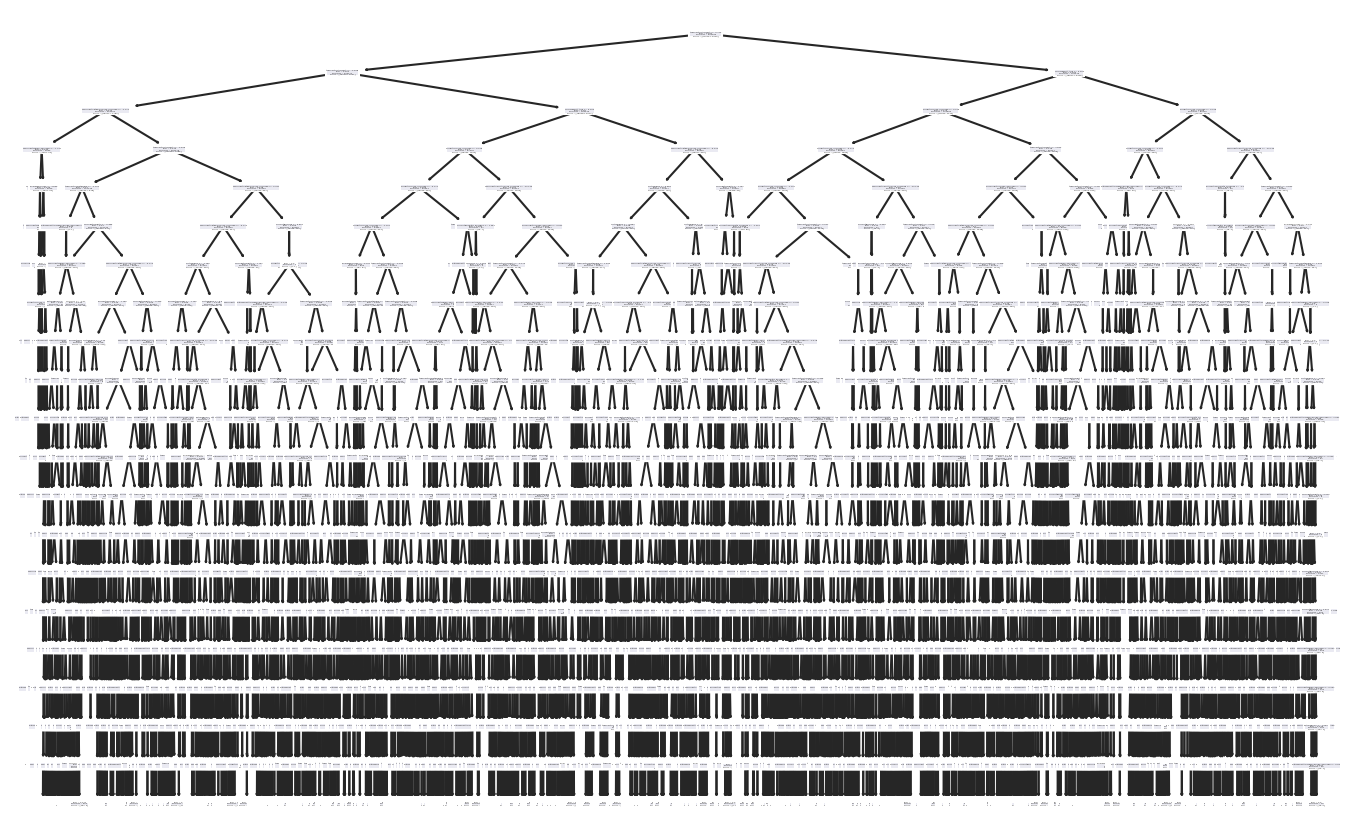

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(11,7),dpi=150)
plot_tree(deci, feature_names=x.columns)

###Predictions

In [32]:
y_pred_deci = deci.predict(x_test)
res_deci = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_deci})
res_deci

,Actual,Predicted
317619,0,0
545360,0,0
490382,0,0
636000,0,0
447578,0,0
...,...,...
435429,0,0
600858,0,0
229231,0,0
773484,0,0


###Model Evaluation using Confusion Matrix

Text(0.5, 20.049999999999997, 'Predicted label')

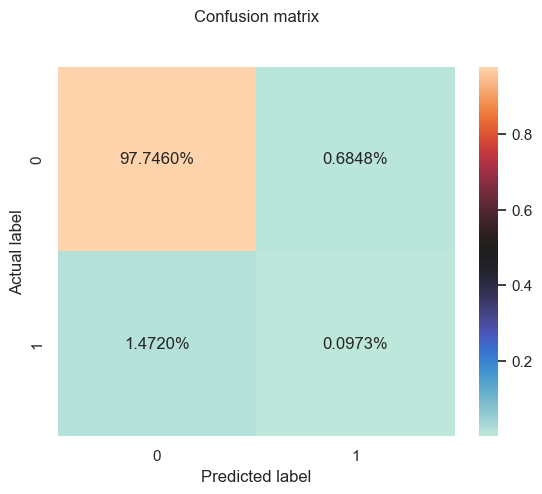

In [33]:
from sklearn import metrics
cm_deci = metrics.confusion_matrix(y_test, y_pred_deci)
sns.heatmap(cm_deci/np.sum(cm_deci), annot=True, fmt='.4%', cmap='icefire')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Performance Report(Precision, Recall, F1-score, Accuracy)

In [47]:
from sklearn.metrics import classification_report
target_names = ['Fraud', 'True Transaction']
print(classification_report(y_test, y_pred_deci, target_names=target_names, digits=4))

                  precision    recall  f1-score   support

           Fraud     0.9852    0.9930    0.9891    154805
True Transaction     0.1244    0.0620    0.0827      2468

        accuracy                         0.9784    157273
       macro avg     0.5548    0.5275    0.5359    157273
    weighted avg     0.9717    0.9784    0.9749    157273



The Model Accuracy is 97.84% according to F1-score.



### Area Under Curve

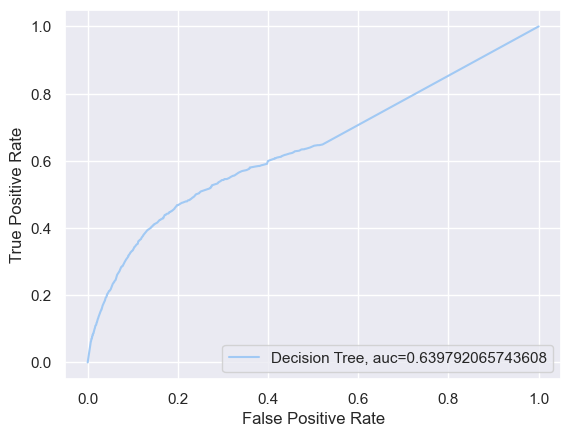

In [87]:
y_pred_d_proba = deci.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_d_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_d_proba)
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(auc1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

###Hyperparameter selection/tuning for Decision Tree

In [ ]:
#hyperparameter grid for searching
param_g = {'max_depth': range(12,15),
              'min_samples_split':range(2,6),
              'min_samples_leaf': [1, 2, 4]}

#dtc instance
dtc = tree.DecisionTreeClassifier()

#grid search instance
from sklearn.model_selection import GridSearchCV
g_search = GridSearchCV(dtc, param_g, cv=5)

# Fit the grid search
g_search.fit(x_train, y_train)

# best hyperparameters and accuracy score
print("Best hyperparameters: ", g_search.best_params_)
print("Best accuracy score: ", g_search.best_score_)

Best hyperparameters:  {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy score:  0.9840992544786914


We have got best hyperparameter values of 'max_depth', 'min_samples_leaf', 'min_samples_split' out of a range choosen 

###Training model on best hyperparameters

In [35]:
#training decision tree again on the basis of above best hyperparameters
deci2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 12, min_samples_leaf= 4, min_samples_split=2,random_state=6)
#fitting model
decifit=deci2.fit(x_train, y_train)

#Prediction

In [37]:

y_pred_deci2 = deci2.predict(x_test)
y_pred_deci2_train = deci2.predict(x_train)

###Plotting classification

[Text(0.4416314065971365, 0.9615384615384616, 'transactionAmount <= -0.173\nentropy = 0.117\nsamples = 629090\nvalue = [619141, 9949]'),
 Text(0.16059113490496174, 0.8846153846153846, 'transactionAmount <= -0.697\nentropy = 0.073\nsamples = 360240\nvalue = [357043, 3197]'),
 Text(0.03287382745001234, 0.8076923076923077, 'merchantCategoryCode_encoded <= -1.711\nentropy = 0.049\nsamples = 159149\nvalue = [158272, 877]'),
 Text(0.004196494692668477, 0.7307692307692307, 'merchantName_encoded <= -1.367\nentropy = 0.155\nsamples = 2901\nvalue = [2836, 65]'),
 Text(0.0024685262898049864, 0.6538461538461539, 'accountNumber <= -0.24\nentropy = 0.406\nsamples = 592\nvalue = [544, 48]'),
 Text(0.0014811157738829918, 0.5769230769230769, 'customerId <= -0.258\nentropy = 0.667\nsamples = 270\nvalue = [223, 47]'),
 Text(0.0009874105159219946, 0.5, 'transactionAmount <= -0.702\nentropy = 0.041\nsamples = 224\nvalue = [223, 1]'),
 Text(0.0004937052579609973, 0.4230769230769231, 'entropy = 0.0\nsamples 

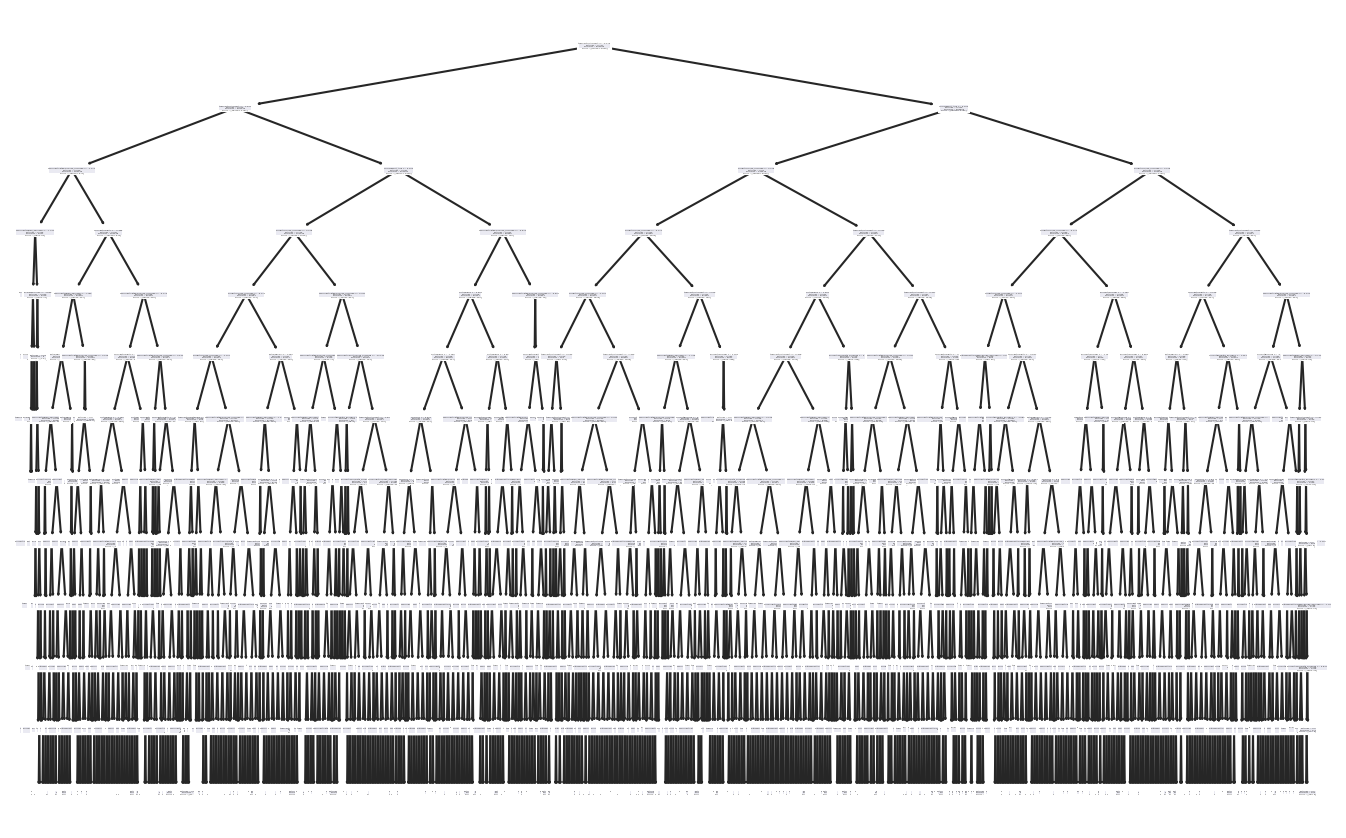

In [ ]:
y_pred_deci2 = deci2.predict(x_test)
y_pred_deci2_train = deci2.predict(x_train)
#PLOTTING CLASSIFICATION
from sklearn.tree import plot_tree
plt.figure(figsize=(11,7),dpi=150)
plot_tree(decifit, feature_names=x.columns)

###Model Evaluation using Confusion Matrix of Hyperparameter

Text(0.5, 20.049999999999997, 'Predicted label')

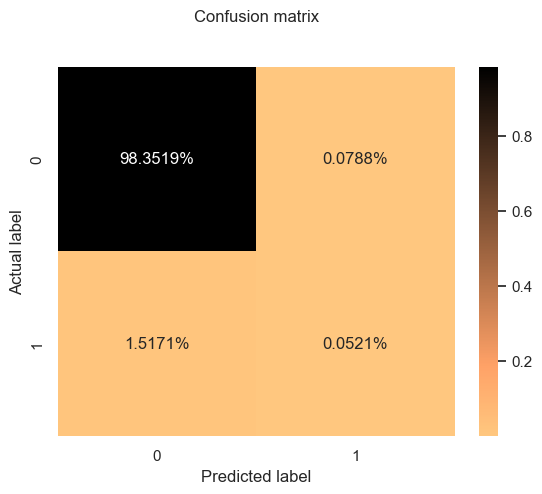

In [42]:

from sklearn import metrics
cm_deci2 = metrics.confusion_matrix(y_test, y_pred_deci2)
sns.heatmap(cm_deci2/np.sum(cm_deci2), annot=True, fmt='.4%', cmap='copper_r')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Performance Report (Precision, Recall, F1-score, Accuracy)

In [43]:
from sklearn.metrics import classification_report
target_names = ['Fraud', 'True Transaction']
print(classification_report(y_test, y_pred_deci2, target_names=target_names, digits=4))

                  precision    recall  f1-score   support

           Fraud     0.9848    0.9992    0.9920    154805
True Transaction     0.3981    0.0332    0.0613      2468

        accuracy                         0.9840    157273
       macro avg     0.6914    0.5162    0.5266    157273
    weighted avg     0.9756    0.9840    0.9773    157273



The Model Accuracy is 98.40% according to F1-score.


### Area Under Curve

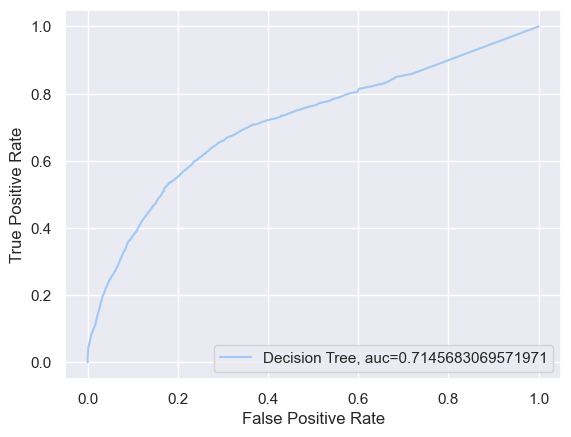

In [64]:
y_pred_d2_proba = deci2.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_d2_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_d2_proba)
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(auc1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

###K-FOLD on Decision Tree 

In [45]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Split the data into K folds
kf = KFold(n_splits=5)
scores = []
# Loop over each fold
for train_index, test_index in kf.split(x):
    
    # # Split the data into training and testing sets for this fold
    # x_train, x_test = x[train_index], x[test_index]
    # y_train, y_test = y[train_index], y[test_index]
    
    # Train a decision tree model on the training data for this fold
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    
    # Evaluate the model on the testing data for this fold
    score = clf.score(x_test, y_test)
    
    # Record the performance for this fold
    scores.append(score)

# Calculate the average performance across all folds
avg_score = sum(scores) / len(scores)
print(avg_score)

0.9690576259116315


In [46]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Split the data into K folds
kf = KFold(n_splits=5)
scores = []
# Loop over each fold
for train_index, test_index in kf.split(x):
    
    # # Split the data into training and testing sets for this fold
    # x_train, x_test = x[train_index], x[test_index]
    # y_train, y_test = y[train_index], y[test_index]
    
    # Train a decision tree model on the training data for this fold
    clf = DecisionTreeClassifier(criterion='entropy',max_depth= 12, min_samples_leaf= 4, min_samples_split=2,random_state=6)
    clf.fit(x_train, y_train)
    
    # Evaluate the model on the testing data for this fold
    score = clf.score(x_test, y_test)
    
    # Record the performance for this fold
    scores.append(score)

# Calculate the average performance across all folds
avg_score = sum(scores) / len(scores)
print(avg_score)

0.9840404901031963


In [47]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Split the data into K folds
kf = KFold(n_splits=15)
scores = []
# Loop over each fold
for train_index, test_index in kf.split(x):
    
    # # Split the data into training and testing sets for this fold
    # x_train, x_test = x[train_index], x[test_index]
    # y_train, y_test = y[train_index], y[test_index]
    
    # Train a decision tree model on the training data for this fold
    clf = DecisionTreeClassifier(criterion='entropy',max_depth= 12, min_samples_leaf= 4, min_samples_split=2,random_state=6)
    clf.fit(x_train, y_train)
    
    # Evaluate the model on the testing data for this fold
    score = clf.score(x_test, y_test)
    
    # Record the performance for this fold
    scores.append(score)

# Calculate the average performance across all folds
avg_score = sum(scores) / len(scores)
print(avg_score)

0.984040490103196


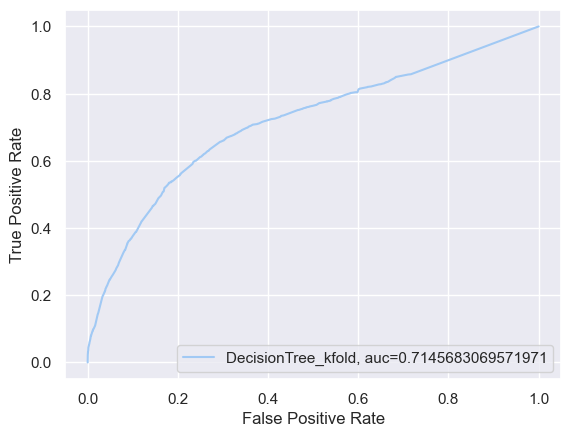

In [67]:

y_pred_decikf_proba = clf.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_decikf_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_decikf_proba)
plt.plot(fpr2,tpr2,label="DecisionTree_kfold, auc="+str(auc2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Optimizing using Gradient Descent

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# # decision tree classifier with best parameters
# dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 12, min_samples_leaf= 4, min_samples_split=2,random_state=6)

# Define the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, random_state=42)

# Fit the Gradient Boosting classifier on the training data
gb.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_sgd = gb.predict(x_test)

# Compute the accuracy score for the test data
accuracy = accuracy_score(y_test, y_pred_sgd)

# Print the accuracy score
print(f"Accuracy score: {accuracy:.6f}")

Accuracy score: 0.984308


###Model Evaluation using Confusion Matrix of Gradient descent

Text(0.5, 20.049999999999997, 'Predicted label')

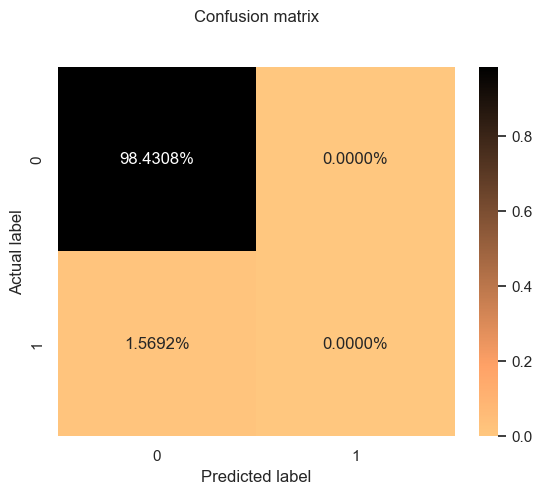

In [49]:
from sklearn import metrics
cm_deci3 = metrics.confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_deci3/np.sum(cm_deci3), annot=True, fmt='.4%', cmap='copper_r')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Performance Report of GD (Precision, Recall, F1-score, Accuracy)

In [50]:
from sklearn.metrics import classification_report
target_names = ['Fraud', 'True Transaction']
print(classification_report(y_test, y_pred_sgd, target_names=target_names, digits=4))

                  precision    recall  f1-score   support

           Fraud     0.9843    1.0000    0.9921    154805
True Transaction     0.0000    0.0000    0.0000      2468

        accuracy                         0.9843    157273
       macro avg     0.4922    0.5000    0.4960    157273
    weighted avg     0.9689    0.9843    0.9765    157273



C:\Users\Pushpak Atey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pushpak Atey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pushpak Atey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

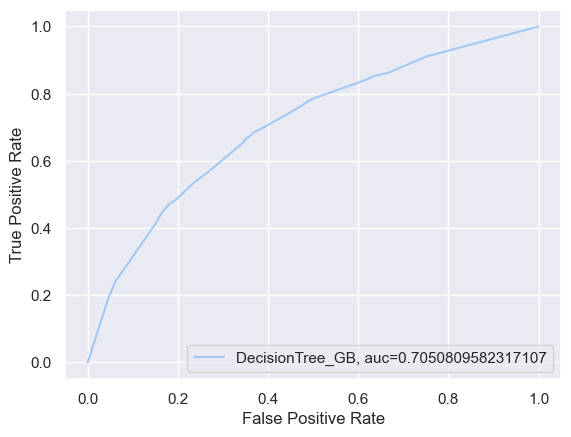

In [68]:
y_pred_gb_proba = gb.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_gb_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_gb_proba)
plt.plot(fpr3,tpr3,label="DecisionTree_GB, auc="+str(auc3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#LOGISTIC REGRESSION CLASSIFIER 

###Model Training

In [51]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Classifier model instance
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)


LogisticRegression(random_state=42)

###Prediction

In [52]:
y_pred_logi = model.predict(x_test)
res_model = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_logi})
res_model

,Actual,Predicted
317619,0,0
545360,0,0
490382,0,0
636000,0,0
447578,0,0
...,...,...
435429,0,0
600858,0,0
229231,0,0
773484,0,0


###Model Evaluation using Confusion Matrix

Text(0.5, 20.049999999999997, 'Predicted label')

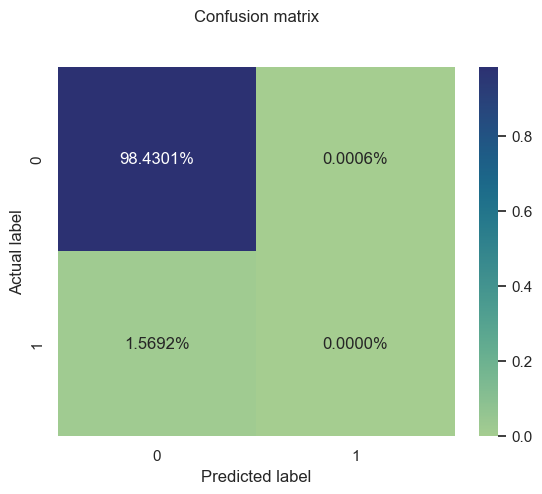

In [53]:
cm_logi = metrics.confusion_matrix(y_test, y_pred_logi)
sns.heatmap(cm_logi/np.sum(cm_logi), annot=True, fmt='.4%', cmap='crest')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Performance Report (Precision, Recall, F1-score, Accuracy)

In [54]:
target_names = ['Fraud', 'True transaction']
print(classification_report(y_test, y_pred_logi, target_names=target_names,digits=4))

                  precision    recall  f1-score   support

           Fraud     0.9843    1.0000    0.9921    154805
True transaction     0.0000    0.0000    0.0000      2468

        accuracy                         0.9843    157273
       macro avg     0.4922    0.5000    0.4960    157273
    weighted avg     0.9689    0.9843    0.9765    157273



accuracy is 98.43

###Area Under Curve

### Radial Basis Function (KERNEL FUNCTION)

In [56]:

from sklearn.kernel_approximation import RBFSampler

# Define the RBF sampler
rbf_feature = RBFSampler(gamma=1, random_state=42)

# Transform the training data using the RBF sampler
X_train_transformed = rbf_feature.fit_transform(x_train)

# Define the logistic regression classifier with your desired parameters
lr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the logistic regression classifier on the transformed training data
lr.fit(X_train_transformed, y_train)

# Transform the test data using the RBF sampler
X_test_transformed = rbf_feature.transform(x_test)

# Predict the labels for the test data
y_pred = lr.predict(X_test_transformed)

# Compute the accuracy score for the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy score: {accuracy:}")

C:\Users\Pushpak Atey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy score: 0.9843075416632225


### K-FOLD on Logistic regression

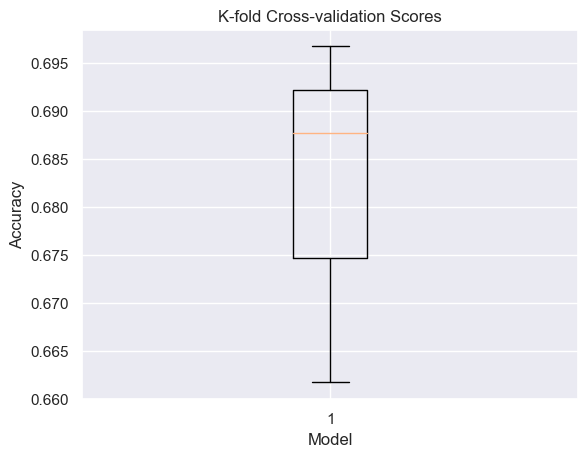

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
scores = []
# generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=3, random_state=42)

# create K-fold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# create Logistic Regression Classifier model
model = LogisticRegression(random_state=42)

# perform K-fold cross-validation and compute scores
scores = cross_val_score(model, X, y, cv=kf)



# plot box plot of scores
plt.boxplot(scores)
plt.title('K-fold Cross-validation Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


# RANDOM FOREST MODEL
1. Importing model from library
2. Hyperparameter tuning
3. Creating model instance and Model fitting
4. Predictions
5. Feature importance
6. Confusion Matrix
7. Report(Precision, Recall, F1-score, Accuracy)
8. AUC

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter selection/tuning for random forest

In [ ]:
model_params = {'n_estimators':range(650,800,50),
    'max_depth': range(12,15),
    'min_samples_split':range(2,6)}

### Training model

In [ ]:
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#MODEL FITTING
r=rfc.fit(x_train,y_train)

**Training the random forest model with the best hyperparameters defined from the previous step**.

###Predictions

In [ ]:
y_pred_rfc=rfc.predict(x_test)
res_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_rfc})
res_rfc

###Feature importance

In [ ]:
#weights of the coefficients and intercept
feature_imp = pd.Series(rfc.feature_importances_, index = x.columns).sort_values(ascending = False)
feature_imp

Plotting the feature importance on basis of the above 

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt. figure(figsize=(16,10))
plt.show()

###Model Evaluation using Confusion Matrix

*   List item
*   List item



In [ ]:
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc/np.sum(cm_rfc), annot=True, fmt='.4%', cmap='crest')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Confusion matrix concludes that when the transaction was true i.e. actual negative values(false negative) are predicted 50.10% correctly and when the transaction was fraud i.e. actual positive values(true positive) are predicted 40.12% correctly.

Also when the value was actual negative (not fraud), the model predicted it to positive (fraud), this happened for 0.19% and when the actual value was positive (fraud) but the model predicted to be negative (not fraud) for 9.60%.

### Model Performance Report (Precision, Recall, F1-score, Accuracy)

In [ ]:
target_names = ['Fraud', 'True transaction']
print(classification_report(y_test, y_pred_rfc, target_names=target_names,digits=4))

The Model Accuracy is 90% according to F1-score.

Precision: Model did predict 99% correctly the fraud transaction. And 12% correctly predicted the true transaction.

Recall : This measures what portion of the model which was identified correctly as actual positive values. Accordingly, our model identified 81% of them.

### Area Under Curve

In [ ]:
y_pred_logi_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_logi_proba)
auc = metrics.roc_auc_score(y_test, y_pred_logi_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Comparing the ROC Curve:

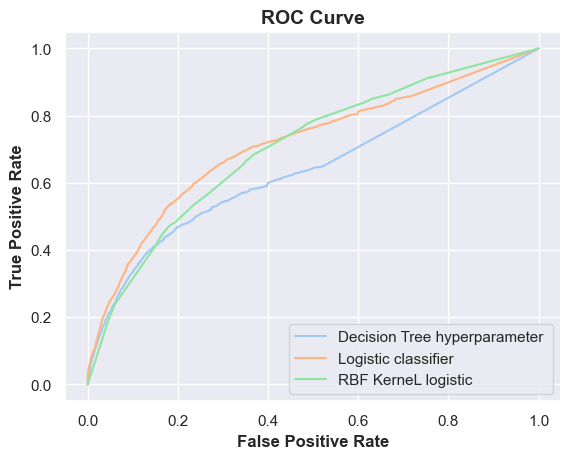

In [92]:
## Comparing ROC Curve
fig, (ax1) = plt.subplots(1)

#ax1.plot(model['fpr'], model['tpr'], label='Logistic Regression, auc = '.format(model['auc']))
#ax1.plot(lr['fpr'], lr['tpr'], label='Logistic_RBF, auc = '.format(lr['auc']))
#ax1.plot(lr2['fpr'], lr2['tpr'], label='Logistic_KFOLD, auc = '.format(lr2['auc']))
#a1.plot(deci2['fpr1'], deci2['tpr1'], label='Decision Tree, auc = '.format(deci2['auc1']))
#ax1.plot(clf['fpr'], clf['tpr'], label='Decision Tree_KFOLD, auc = '.format(clf['auc']))
#ax1.plot(gb['fpr'], gb['tpr'], label='Decision Tree_SGD, auc = '.format(gb['auc']))
plt.plot(fpr1,tpr1,label="Decision Tree hyperparameter ")
plt.plot(fpr2,tpr2,label="Logistic classifier ")
plt.plot(fpr3,tpr3,label="RBF KerneL logistic ")






## Configure x and y axis
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc=4)

plt.show()